# Data Integration

Data integration is the process of combining data from different sources into a single, unified view. It involves merging data from multiple sources and ensuring that the data is consistent and accurate.

The need for data integration arises when organizations have data spread across multiple systems and applications, making it difficult to analyze and gain insights. For example, a company may have customer data stored in a CRM system, sales data stored in a separate database, and marketing data stored in yet another system. Integrating this data can provide a more complete picture of the business and help to identify trends and opportunities.

There are several methods for data integration, including:

- **Manual integration:** This involves manually combining data from different sources into a single dataset. It can be time-consuming and error-prone, but it may be necessary when dealing with small amounts of data or when the data sources are incompatible.
- **Application programming interface (API) integration:** This involves using APIs to extract data from different systems and integrate it into a single dataset. It can be an efficient way to integrate data, but it requires technical expertise to set up and maintain. Python's `requests` library can be used for making API calls and fetching data from data sources that provide APIs. Other libraries like `urllib` and `http.client` can also be used for this purpose.
- **ETL (extract, transform, load) integration:** This involves extracting data from different sources, transforming it to meet the needs of the target system, and loading it into a target database or data warehouse. ETL tools are commonly used to automate this process, making it more efficient and less error-prone. Python has several powerful ETL tools like `Apache Nifi`, `Apache Airflow`, and `Apache Beam`. These tools allow developers to extract data from various sources, perform transformations, and load it into a target database or data warehouse.
- **Virtual integration:** This involves creating a virtual view of the data, where data from different sources appears as if it is stored in a single database. This approach can be useful when dealing with large amounts of data or when the data sources are incompatible. Virtual integration can be achieved using tools like `Apache Drill`, `Apache Calcite`, or `Apache Ignite`. These tools provide a virtual layer over multiple data sources, enabling users to access and analyze data from multiple sources as if they were a single source.

Some of the commonly used data integration techniques include concatenation, merging, joining and stacking different datasets. Let's take a thorough look into each of those methods.

## Concatenation

Concatenation is the process of combining two or more dataframes by appending them along a particular axis. To concatenate two or more dataframes along rows or columns, you can use the `pd.concat()` function from the `pandas` library.

In [1]:
import pandas as pd

In [7]:
df1 = pd.DataFrame(
    {"acc":[1,2,3], "name":[0,9,8], "age":[2,4,6]}
)
df2 = pd.DataFrame(
    {"acc":[1,2,3], "principle":[2,4,55], "interest":[4.5,7.8,9.8]}
)

In [11]:
df1

,acc,name,age
0,1,0,2
1,2,9,4
2,3,8,6


In [12]:
df2

,acc,principle,interest
0,1,2,4.5
1,2,4,7.8
2,3,55,9.8


In [8]:
pd.concat([df1,df2], axis = 1)

,acc,name,age,acc,principle,interest
0,1,0,2,1,2,4.5
1,2,9,4,2,4,7.8
2,3,8,6,3,55,9.8


In [10]:
pd.concat([df1,df2], axis = 0, ignore_index=True)

,acc,name,age,principle,interest
0,1,0.0,2.0,NaN,NaN
1,2,9.0,4.0,NaN,NaN
2,3,8.0,6.0,NaN,NaN
3,1,NaN,NaN,2.0,4.5
4,2,NaN,NaN,4.0,7.8
5,3,NaN,NaN,55.0,9.8


## Merging

Merging is the process of combining two or more dataframes based on common columns. This technique is used when the datasets have some common columns. You can use the `pd.merge()` function from the `pandas` library to merge dataframes.


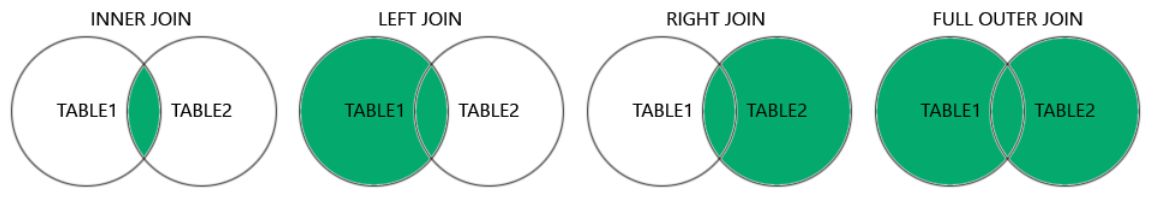

In [14]:
df1 = pd.DataFrame(
    {"key":["A","B","C","D"], "inv_val":[99, 55,33,22], "acc":[1,3,5,7]}
)

df2 = pd.DataFrame(
    {"key":["E","B","C","Z"], "hel_ratio":[99, 45,33,32], "acc":[11,32,53,74]}
)

In [15]:
df1

,key,inv_val,acc
0,A,99,1
1,B,55,3
2,C,33,5
3,D,22,7


In [16]:
df2

,key,hel_ratio,acc
0,E,99,11
1,B,45,32
2,C,33,53
3,Z,32,74


In [20]:
pd.merge(df1, df2, how = "inner", on = "key", suffixes = ("_df1","_df2"))

,key,inv_val,acc_df1,hel_ratio,acc_df2
0,B,55,3,45,32
1,C,33,5,33,53


In [26]:
pd.merge(df1, df2, how = "outer", on = "key", suffixes = ("_df1","_df2"))

,key,inv_val,acc_df1,hel_ratio,acc_df2
0,A,99.0,1.0,NaN,NaN
1,B,55.0,3.0,45.0,32.0
2,C,33.0,5.0,33.0,53.0
3,D,22.0,7.0,NaN,NaN
4,E,NaN,NaN,99.0,11.0
5,Z,NaN,NaN,32.0,74.0


In [22]:
pd.merge(df1, df2, how = "left", on = "key", suffixes = ("_df1","_df2"))

,key,inv_val,acc_df1,hel_ratio,acc_df2
0,A,99,1,NaN,NaN
1,B,55,3,45.0,32.0
2,C,33,5,33.0,53.0
3,D,22,7,NaN,NaN


In [24]:
pd.merge(df1, df2, how = "right", on = "key", suffixes = ("_df1","_df2"))

,key,inv_val,acc_df1,hel_ratio,acc_df2
0,E,NaN,NaN,99,11
1,B,55.0,3.0,45,32
2,C,33.0,5.0,33,53
3,Z,NaN,NaN,32,74


Two datasets from different vendors:

vendor_a.csv: product_id, price

vendor_b.csv: product_id, stock

Questions:

1. Which merge type keeps only products present in both datasets?

2. How would you keep all products from both vendors?

3. How can you identify products that exist only in one source?

After merging two DataFrames, you notice unexpected row duplication.

Questions:

1. What does this indicate about the merge keys?

2. How can you detect duplicate keys before merging?

3. Which pandas argument helps track the source of each row after merging?

In [28]:
# Alternative Syntax
         
df1.merge(df2, on = "key", how= "inner")

,key,inv_val,acc_x,hel_ratio,acc_y
0,B,55,3,45,32
1,C,33,5,33,53


## Joining

Joining is similar to merging, but is specifically used to combine dataframes based on their indexes. You can use the `pd.DataFrame.join()` method to join dataframes.

In [36]:
df1 = df1.set_index("key")
df1

,inv_val,acc
key,,
A,99,1
B,55,3
C,33,5
D,22,7


In [37]:
df2 = df2.set_index("key")
df2

,hel_ratio,acc
key,,
E,99,11
B,45,32
C,33,53
Z,32,74


In [38]:
df1.join(df2, how = "inner", lsuffix="_left", rsuffix="_right")

,inv_val,acc_left,hel_ratio,acc_right
key,,,,
B,55,3,45,32
C,33,5,33,53


## Stacking

Stacking is the process of vertically combining datasets with the same columns. The datasets are aligned by their column names and then stacked on top of each other. You can use the `dataframe.stack()` function to stack a dataframe.

In [39]:
df1

,inv_val,acc
key,,
A,99,1
B,55,3
C,33,5
D,22,7


In [41]:
stacked = df1.stack()
stacked

key         
A    inv_val    99
     acc         1
B    inv_val    55
     acc         3
C    inv_val    33
     acc         5
D    inv_val    22
     acc         7
dtype: int64

In [42]:
stacked.unstack()

,inv_val,acc
key,,
A,99,1
B,55,3
C,33,5
D,22,7
